# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

** Download the data from website. **

In [1]:
!wget https://raw.githubusercontent.com/zhianwang/istm-6212/master/Project-02/Campaign_Finance_Dallas.csv

--2016-11-11 15:56:52--  https://raw.githubusercontent.com/zhianwang/istm-6212/master/Project-02/Campaign_Finance_Dallas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12773319 (12M) [text/plain]
Saving to: ‘Campaign_Finance_Dallas.csv’

Campaign_Finance_Da 100%[=====================>]  12.18M  52.8MB/s   in 0.2s   

2016-11-11 15:56:53 (52.8 MB/s) - ‘Campaign_Finance_Dallas.csv’ saved [12773319/12773319]



** Rename the csv file. **

In [2]:
!mv Campaign_Finance_Dallas.csv Dallas.csv

** Let's have a look about the first 5 rows of the data to get an overview. **

In [3]:
!head  Dallas.csv|csvcut -c1,2,3,4| csvlook
!head  Dallas.csv|csvcut -c5,6,7,8| csvlook
!head  Dallas.csv|csvcut -c9,10,11,12| csvlook
!head  Dallas.csv|csvcut -c13,14,15,16| csvlook
!head  Dallas.csv|csvcut -c17,18,19| csvlook

|---------+-----------+-----------+-----------------------------------------------------------------------------------|
|  ﻿ID    | Record ID | Report ID | File Link                                                                         |
|---------+-----------+-----------+-----------------------------------------------------------------------------------|
|  A11168 | 11168     | 213       | http://campfin.dallascityhall.com/FinalReports/rpt0000000213_20090115_152026.pdf  |
|  A11169 | 11169     | 213       | http://campfin.dallascityhall.com/FinalReports/rpt0000000213_20090115_152026.pdf  |
|  A11170 | 11170     | 213       | http://campfin.dallascityhall.com/FinalReports/rpt0000000213_20090115_152026.pdf  |
|---------+-----------+-----------+-----------------------------------------------------------------------------------|
|-------------+-----------+---------------+---------------|
|  First Name | Last Name | Business Name | Contact Type  |
|-------------+-----------+-------------

** Chcek the basic statistic information about the file. **

In [4]:
!csvstat Dallas.csv

  1. ﻿ID
	<class 'str'>
	Nulls: False
	Unique values: 35712
	Max length: 7
  2. Record ID
	<class 'int'>
	Nulls: False
	Min: 33
	Max: 37940
	Sum: 685785755
	Mean: 19203.23014672939
	Median: 17487.5
	Standard Deviation: 9714.119751035087
	Unique values: 29492
	5 most frequent values:
		251:	3
		221:	3
		265:	3
		243:	3
		271:	3
  3. Report ID
	<class 'int'>
	Nulls: False
	Min: 190
	Max: 1088
	Sum: 20946080
	Mean: 586.5277777777778
	Median: 584.0
	Standard Deviation: 222.97116674017892
	Unique values: 720
	5 most frequent values:
		449:	1006
		812:	746
		585:	710
		547:	702
		270:	642
  4. File Link
	<class 'str'>
	Nulls: False
	Unique values: 720
	5 most frequent values:
		http://campfin.dallascityhall.com/FinalReports/rpt0000000449_20100312_154155.pdf:	1006
		http://campfin.dallascityhall.com/FinalReports/rpt0000000812_20130411_131431.pdf:	746
		http://campfin.dallascityhall.com/FinalReports/caf0000000585_20110523_151253.pdf:	710
		http://campfin.dallascityhall.com/FinalReports/caf0000

### What do the columns mean

ID: Unique identifier for record

Record ID: Unique identifier for search

Report ID: Unique identifier for report

File Link: PDF Link to Report

First Name: Client first name who paid the amount

Last Name: Client last name who paid the amount

Business Name: Client Business name who paid the amount

Contact Type: Type of the client

Record Type: The election for which the client made the contribution

Amount: The amount of the contribution

Schedule Type: The type of the contribution

Candidate Name: The name of candidate

Election Date: The date of election

Transaction Date: The date of transaction

Street: The street name

City: The city name

State: The state name

Zipcode: The zipcode

Geo Location: Specific location including longtitude and latitude

### Are there NULL values?

There are NULL values in First Name, Last Name, Buiness Name and Election Date

### Which columns interest you the most?

The Amount, Transaction Date, Candidate Name

### Which columns present some opportunities, challenges, or questions you would like to ask?

What is the average amount of contribution? What is the Candidate Information of the top 5 amount of contribution? the detailed information in record of the Top5 amount of the contribution.

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

** Create and connect to database. **

In [5]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [6]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


The following cells create the database 'project2' and make a connection to it.

In [7]:
!createdb -U dbuser project2

In [8]:
%sql postgresql://dbuser@localhost/project2

'Connected: dbuser@project2'

** Create table. **

In [9]:
%%sql
DROP TABLE IF EXISTS dallas;
CREATE TABLE dallas
(
    ID VARCHAR(7),
    RECORD_ID INTEGER,
    REPORT_ID INTEGER,
    FILE_LINK VARCHAR(80),
    FIRST_NAME VARCHAR(35),
    LAST_NAME VARCHAR(35),
    BUSINESS_NAME VARCHAR(100),
    CONTACT_TYPE VARCHAR(35),
    RECORD_TYPE VARCHAR(50),
    AMOUNT FLOAT,
    SCHEDULE_TYPE VARCHAR(75),
    CANDIDATE_NAME VARCHAR(55),
    ELECTION_DATE TIMESTAMP,
    TRANSACTION_DATE TIMESTAMP,
    STREET VARCHAR(45),
    CITY VARCHAR(25),
    STATE CHAR(2),
    ZIPCODE VARCHAR(10),
    GEO_LOCATION VARCHAR(80)
)

Done.
Done.


[]

** Load the data. **

In [10]:
!pwd

/home/jovyan/work


In [11]:
%%sql
COPY dallas FROM '/home/jovyan/work/Dallas.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

35712 rows affected.


[]

** Verify the loaded records. **

Below cell shows that the records number loaded to database is correct.

In [12]:
%%sql
SELECT COUNT(*) FROM dallas;

1 rows affected.


count
35712


In [13]:
%%sql
UPDATE dallas SET first_name = 'Unknown' where first_name is null;
UPDATE dallas SET last_name = 'Unknown' where last_name is null;
UPDATE dallas SET business_name = 'Unknown' where business_name is null;
UPDATE dallas SET election_date = '01/01/1900  00:00:00 AM' where election_date is null;


10534 rows affected.
10547 rows affected.
24552 rows affected.
10562 rows affected.


[]

Now, let's see the first 5 rows in the database.

In [14]:
%%sql
SELECT * FROM dallas
LIMIT 10;

10 rows affected.


id,record_id,report_id,file_link,first_name,last_name,business_name,contact_type,record_type,amount,schedule_type,candidate_name,election_date,transaction_date,street,city,state,zipcode,geo_location
A11168,11168,213,http://campfin.dallascityhall.com/FinalReports/rpt0000000213_20090115_152026.pdf,Randall,White,Unknown,Contributor,January 15: Semi-Annual 2009,100.0,Political Contributions Other Than Pledges Or Loans,Delia Jasso,1900-01-01 00:00:00,2008-10-21 00:00:00,1939 Mayflower Drive,Dallas,TX,75208,"1939 Mayflower DriveDallas, TX 75208(32.758261, -96.854029)"
A11169,11169,213,http://campfin.dallascityhall.com/FinalReports/rpt0000000213_20090115_152026.pdf,Stephen,Levine,Unknown,Contributor,January 15: Semi-Annual 2009,50.0,Political Contributions Other Than Pledges Or Loans,Delia Jasso,1900-01-01 00:00:00,2008-10-21 00:00:00,1640 Sylvan Avenue,Dallas,TX,75208,"1640 Sylvan AvenueDallas, TX 75208(32.76537, -96.8355)"
A11805,11805,264,http://campfin.dallascityhall.com/FinalReports/rpt0000000264_20090409_125930.pdf,Carmen,Trevino,Unknown,Contributor,April 9: 30th Day Before General Election 2009,25.0,Political Contributions Other Than Pledges Or Loans,Citizens Against The Taxpayer-Owned Hotel,2009-05-09 00:00:00,2009-03-19 00:00:00,3023 Texas Drive,Dallas,TX,75211,"3023 Texas DriveDallas, TX 75211(32.72357, -96.870827)"
A12438,12438,263,http://campfin.dallascityhall.com/FinalReports/rpt0000000263_20090409_111136.pdf,Windy,Lopez,Unknown,Contributor,April 9: 30th Day Before General Election 2009,100.0,Political Contributions Other Than Pledges Or Loans,Sheffield Kadane,2009-05-09 00:00:00,2009-02-20 00:00:00,4931 Stanford Avenue,Dallas,TX,75209,"4931 Stanford AvenueDallas, TX 75209(32.85321, -96.825441)"
A12442,12442,263,http://campfin.dallascityhall.com/FinalReports/rpt0000000263_20090409_111136.pdf,Nita Sue,Kadane,Unknown,Contributor,April 9: 30th Day Before General Election 2009,500.0,Political Contributions Other Than Pledges Or Loans,Sheffield Kadane,2009-05-09 00:00:00,2009-02-20 00:00:00,5706 Holly Hill Circle,Dallas,TX,75231,"5706 Holly Hill CircleDallas, TX 75231(32.878887, -96.755344)"
A12443,12443,263,http://campfin.dallascityhall.com/FinalReports/rpt0000000263_20090409_111136.pdf,Harvey,Wiggins,Unknown,Contributor,April 9: 30th Day Before General Election 2009,500.0,Political Contributions Other Than Pledges Or Loans,Sheffield Kadane,2009-05-09 00:00:00,2009-02-20 00:00:00,6738 Alexander Drive,Dallas,TX,75214,"6738 Alexander DriveDallas, TX 75214(32.828412, -96.743882)"
A12945,12945,265,http://campfin.dallascityhall.com/FinalReports/rpt0000000265_20090409_151632.pdf,Hershelle,Roe,Unknown,Contributor,April 9: 30th Day Before General Election 2009,5.0,Political Contributions Other Than Pledges Or Loans,Casey Thomas,2009-05-09 00:00:00,2009-01-02 00:00:00,7407 Ashcrest Lane,Dallas,TX,75249,"7407 Ashcrest LaneDallas, TX 75249(32.643476, -96.951586)"
A13539,13539,270,http://campfin.dallascityhall.com/FinalReports/rpt0000000270_20090409_101429.pdf,Earl,Fulmer,Unknown,Contributor,April 9: 30th Day Before General Election 2009,50.0,Political Contributions Other Than Pledges Or Loans,ANN MARGOLIN,2009-05-09 00:00:00,2009-03-09 00:00:00,3333 Jubilee Trl.,Dallas,TX,75229,"3333 Jubilee TrlDallas, TX 75229(32.900093, -96.864503)"
A11536,11536,243,http://campfin.dallascityhall.com/FinalReports/rpt0000000243_20090115_170142.pdf,Cecil,Proctor,Contributor,Contributor,January 15: Semi-Annual 2009,100.0,Political Contributions Other Than Pledges Or Loans,Don Robinson,1900-01-01 00:00:00,2008-12-18 00:00:00,1111 E. ledbetter Dr,Dallas,TX,75216,"1111 E ledbetter DrDallas, TX 75216(32.682541, -96.807368)"
A11537,11537,243,http://campfin.dallascityhall.com/FinalReports/rpt0000000243_20090115_170142.pdf,Alice,McPhail,Contributor,Contributor,January 15: Semi-Annual 2009,100.0,Political Contributions Other Than Pledges Or Loans,Don Robinson,1900-01-01 00:00:00,2008-12-18 00:00:00,6247 Harmony Ln.,Dallas,TX,75241,"6247 Harmony LnDallas, TX 7524

## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

** Below is the link to our Star Schema diagram.**

https://www.processon.com/view/link/5825245de4b0fa6ffb9a7584

In [15]:
from IPython.display import Image
Image(url = "https://raw.githubusercontent.com/zhianwang/istm-6212/master/Project-02/Pjt2_Star%20Schema%20diagram.JPG", width=800, height=800)

** First, we need to find two comlumns which have one to one correspondence. **

In [16]:
%%sql
SELECT COUNT(*),'report_id' as attribute_name
FROM (SELECT DISTINCT report_id
     FROM dallas)table1
UNION
SELECT COUNT(*),'file_link' as attribute_name
FROM (SELECT DISTINCT file_link
     FROM dallas)table2

2 rows affected.


count,attribute_name
720,file_link
720,report_id


In [17]:
%%sql
SELECT DISTINCT report_id  || ' ' || file_link AS FileLink_ReportID, report_id, file_link
FROM dallas;

720 rows affected.


filelink_reportid,report_id,file_link
867 http://campfin.dallascityhall.com/FinalReports/rpt0000000867_20130503_145103.pdf,867,http://campfin.dallascityhall.com/FinalReports/rpt0000000867_20130503_145103.pdf
275 http://campfin.dallascityhall.com/FinalReports/rpt0000000275_20090408_210613.pdf,275,http://campfin.dallascityhall.com/FinalReports/rpt0000000275_20090408_210613.pdf
568 http://campfin.dallascityhall.com/FinalReports/caf0000000568_20110418_164013.pdf,568,http://campfin.dallascityhall.com/FinalReports/caf0000000568_20110418_164013.pdf
678 http://campfin.dallascityhall.com/FinalReports/rpt0000000678_20120117_132909.pdf,678,http://campfin.dallascityhall.com/FinalReports/rpt0000000678_20120117_132909.pdf
595 http://campfin.dallascityhall.com/FinalReports/rpt0000000595_20110506_120545.pdf,595,http://campfin.dallascityhall.com/FinalReports/rpt0000000595_20110506_120545.pdf
683 http://campfin.dallascityhall.com/FinalReports/rpt0000000683_20120117_100711.pdf,683,http://campfin.dallascityhall.com/FinalReports/rpt0000000683_20120117_100711.pdf
217 http://campfin.dallascityhall.com/FinalReports/rpt0000000217_20090113_143345.pdf,217,http://campfin.dallascityhall.com/FinalReports/rpt0000000217_20090113_143345.pdf
321 http://campfin.dallascityhall.com/FinalReports/rpt0000000321_20090429_224816.pdf,321,http://campfin.dallascityhall.com/FinalReports/rpt0000000321_20090429_224816.pdf
348 http://campfin.dallascityhall.com/FinalReports/rpt0000000348_20090501_153653.pdf,348,http://campfin.dallascityhall.com/FinalReports/rpt0000000348_20090501_153653.pdf
750 http://campfin.dallascityhall.com/FinalReports/rpt0000000750_20130104_123117.pdf,750,http://campfin.dallascityhall.com/FinalReports/rpt0000000750_20130104_123117.pdf


From the data exploration, we can see that only report_id and file_link have a one-to-one relationship.

We decided to build 5 demension tables: Report, Record, Client, Candidate, Address, and put the five surrogate keys into a fact table.

Build a demension table named Report for report_id and file_link, and set report_id as surrogate key.

In [18]:
%%sql
DROP TABLE IF EXISTS Report;
CREATE TABLE Report
(
    report_id INTEGER NOT NULL,
    file_link VARCHAR(80),
    PRIMARY KEY (report_id)
);


Done.
Done.


[]

In [19]:
%%sql
INSERT INTO Report (report_id, file_link)
SELECT DISTINCT report_id, file_link
FROM dallas

720 rows affected.


[]

In [20]:
%%sql
SELECT *
FROM Report
LIMIT 5

5 rows affected.


report_id,file_link
636,http://campfin.dallascityhall.com/FinalReports/rpt0000000636_20110620_152355.pdf
896,http://campfin.dallascityhall.com/FinalReports/rpt0000000896_20130710_151314.pdf
229,http://campfin.dallascityhall.com/FinalReports/rpt0000000229_20090115_155254.pdf
374,http://campfin.dallascityhall.com/FinalReports/rpt0000000374_20090709_134750.pdf
621,http://campfin.dallascityhall.com/FinalReports/rpt0000000621_20110510_001448.pdf


**Build a demension table for record_id, including record_type and transaction_date. Setting record_id as surrogate key.**

In [21]:
%%sql
DROP TABLE IF EXISTS Record;
CREATE TABLE Record
(
    id varchar(7) NOT NULL,
    record_type VARCHAR(50),
    transaction_date TIMESTAMP,
    PRIMARY KEY (id)
)


Done.
Done.


[]

In [22]:
%%sql
INSERT INTO Record (id, record_type, transaction_date)
SELECT DISTINCT id, record_type, transaction_date
FROM dallas

35712 rows affected.


[]

In [23]:
%%sql
SELECT *
FROM Record
LIMIT 5

5 rows affected.


id,record_type,transaction_date
A9290,January 15: Semi-Annual 2009,2008-07-29 00:00:00
F17698,July 15 Semi-Annual 2013,2013-06-12 00:00:00
F8058,July 15: Semi-Annual 2009,2009-05-09 00:00:00
F17297,July 15 Semi-Annual 2013,2013-05-09 00:00:00
A28948,July 15: Semi-Annual 2011,2011-06-17 00:00:00


**Build a demension table for client_id, including first_name, last_name, business_name and contact_type. Setting client_id as surrogate key.**

In [24]:
%%sql
DROP TABLE IF EXISTS Client;
CREATE TABLE Client
(
    client_id serial,
    first_name varchar(35),
    last_name varchar(35),
    business_name varchar(100),
    contact_type varchar(35),
    PRIMARY KEY (client_id)
)


Done.
Done.


[]

In [25]:
%%sql
INSERT INTO Client (first_name, last_name, business_name, contact_type)
SELECT DISTINCT first_name, last_name, business_name, contact_type
FROM dallas

18918 rows affected.


[]

In [26]:
%%sql
SELECT *
FROM Client
LIMIT 5

5 rows affected.


client_id,first_name,last_name,business_name,contact_type
1,R.B.,Hurley,Friend,Contributor
2,Jean,Gatewood,Unknown,Contributor
3,Susan,Montgomery,Unknown,Contributor
4,William,Pedersen,Unknown,Contributor
5,Unknown,Unknown,metrotex association of realtors pac,Contributor


** Build a demension table for candidate_id, including candidate_name and election_date. Setting candidate_id as surrogate key.**

In [27]:
%%sql
DROP TABLE IF EXISTS Candidate;
CREATE TABLE Candidate
(
    candidate_id serial,
    candidate_name varchar(55),
    election_date timestamp,
    PRIMARY KEY (candidate_id)
)


Done.
Done.


[]

In [28]:
%%sql
INSERT INTO Candidate (candidate_name, election_date)
SELECT DISTINCT candidate_name, election_date
FROM dallas

299 rows affected.


[]

In [29]:
%%sql
SELECT *
FROM Candidate
LIMIT 5

5 rows affected.


candidate_id,candidate_name,election_date
1,Scott Griggs,2013-05-12 00:00:00
2,Dominique Alexander,1900-01-01 00:00:00
3,Casey Thomas,2008-05-09 00:00:00
4,Carolyn Davis,1900-01-01 00:00:00
5,Sean Paul Segura,1900-01-01 00:00:00


** Build a demension table for address_id, including street, city, state, zipcode and geo_location. Setting record_id as surrogate key.**

In [30]:
%%sql
DROP TABLE IF EXISTS Address;
CREATE TABLE Address
(
    address_id serial,
    street varchar(45),
    city varchar(25),
    state char(2),
    zipcode varchar(10),
    geo_location varchar(80),
    PRIMARY KEY (address_id)
)

Done.
Done.


[]

In [31]:
%%sql
INSERT INTO Address (street, city, state, zipcode, geo_location)
SELECT DISTINCT street, city, state, zipcode, geo_location
FROM dallas

19518 rows affected.


[]

In [32]:
%%sql
SELECT *
FROM Address
LIMIT 5

5 rows affected.


address_id,street,city,state,zipcode,geo_location
1,1310 Memory Lane,Dallas,TX,75217,"1310 Memory LaneDallas, TX 75217(32.734621, -96.659241)"
2,11311 N. Central Expy. Ste. 335,Dallas,TX,75243,"11311 N Central ExpyDallas, TX 75243(32.901947, -96.769442)"
3,5144 Richard Avenue,Dallas,TX,75206,"5144 Richard AvenueDallas, TX 75206(32.819165, -96.782696)"
4,3021 Ramona,Fort Worth,TX,76116,"3021 RamonaFort Worth, TX 76116(32.72964, -97.444914)"
5,13000 Vista Del Norte,San Antonio,TX,78216,"13000 VistaSan Antonio, TX 78216(29.562985, -98.512235)"


** Create a fact table, including all the surrogate keys in demensiona tables, and amount and schedule_type. **

In [33]:
%%sql
DROP TABLE IF EXISTS Fact;
CREATE TABLE Fact
(
    id varchar(7) NOT NULL,
    report_id integer NOT NULL,
    client_id integer,
    address_id integer,
    candidate_id integer,
    amount float,
    schedule_type varchar(75)
)

Done.
Done.


[]

** Update the id, report id, amount and schedule_type. **

In [34]:
%%sql
INSERT INTO Fact (id, report_id, amount, schedule_type)
SELECT id, report_id, amount, schedule_type
FROM dallas

35712 rows affected.


[]

#### Update the Client_id, Candidate_id and Address_id.

In [35]:
%%sql
UPDATE 
  Fact T1  
SET 
  client_id = T2.client_id 
FROM Client T2 
     INNER JOIN Dallas T3 ON T2.first_name = T3.first_name AND T2.last_name = T3.last_name AND T2.business_name = T3.business_name AND T2.contact_type = T3.contact_type
WHERE 
  T1.ID = T3.ID
;

35712 rows affected.


[]

In [36]:
%%sql
UPDATE 
  Fact T1  
SET 
  candidate_id = T2.candidate_id 
FROM Candidate T2 
     INNER JOIN Dallas T3 ON T2.candidate_name = T3.candidate_name AND T2.election_date = T3.election_date
WHERE 
  T1.ID = T3.ID
;

35712 rows affected.


[]

In [37]:
%%sql
UPDATE 
  Fact T1  
SET 
  address_id = T2.address_id 
FROM Address T2 
     INNER JOIN Dallas T3 ON T2.Street = T3.Street AND T2.city = T3.city AND T2.state = T3.state AND T2.zipcode = T3.zipcode AND T2.geo_location = T3.geo_location
WHERE 
  T1.ID = T3.ID
;

35712 rows affected.


[]

In [38]:
%%sql
SELECT *
FROM Fact
ORDER BY id
LIMIT 10

10 rows affected.


id,report_id,client_id,address_id,candidate_id,amount,schedule_type
A10000,207,363,13798,99,100.0,Political Contributions Other Than Pledges Or Loans
A10001,207,12945,11605,99,1000.0,Political Contributions Other Than Pledges Or Loans
A10002,207,2722,14830,99,25.0,Political Contributions Other Than Pledges Or Loans
A10003,207,4581,13645,99,250.0,Political Contributions Other Than Pledges Or Loans
A10004,207,12857,12696,99,1000.0,Political Contributions Other Than Pledges Or Loans
A10005,207,2009,12141,99,1000.0,Political Contributions Other Than Pledges Or Loans
A10006,207,3146,7892,99,50.0,Political Contributions Other Than Pledges Or Loans
A10007,207,8581,17773,99,100.0,Political Contributions Other Than Pledges Or Loans
A10008,207,18901,5015,99,1000.0,Political Contributions Other Than Pledges Or Loans
A10009,207,2347,12893,99,500.0,Political Contributions Other Than Pledges Or Loans


** Add foreign keys. **

In [39]:
%%sql
ALTER TABLE Fact
ADD CONSTRAINT inspect_FK_client_ID FOREIGN KEY (client_ID)
REFERENCES Client(client_id) ON DELETE NO ACTION

Done.


[]

In [40]:
%%sql
ALTER TABLE Fact
ADD CONSTRAINT inspect_FK_address_ID FOREIGN KEY (address_ID)
REFERENCES Address(address_id) ON DELETE NO ACTION

Done.


[]

In [41]:
%%sql
ALTER TABLE Fact
ADD CONSTRAINT inspect_FK_candidate_ID FOREIGN KEY (candidate_ID)
REFERENCES Candidate(candidate_id) ON DELETE NO ACTION

Done.


[]

** Check the keys.**

In [42]:
%%sql
SELECT CONSTRAINT_NAME, TABLE_NAME, COLUMN_NAME
FROM INFORMATION_SCHEMA.KEY_COLUMN_USAGE
WHERE TABLE_CATALOG = 'project2'

8 rows affected.


constraint_name,table_name,column_name
report_pkey,report,report_id
record_pkey,record,id
client_pkey,client,client_id
candidate_pkey,candidate,candidate_id
address_pkey,address,address_id
inspect_fk_client_id,fact,client_id
inspect_fk_address_id,fact,address_id
inspect_fk_candidate_id,fact,candidate_id


## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

### Aggregate

** Show the statistic of contribution **

In [43]:
%%sql
SELECT AVG(amount), MIN(amount), MAX(amount), STDDEV(amount)
FROM Fact

1 rows affected.


avg,min,max,stddev
1321.59811183916,0.0,750000.0,11702.1618439674


### Transformation

In [44]:
%%sql
SELECT TO_CHAR(transaction_date, 'YYYY-MM-DD') AS day_of_year, 
    TO_CHAR(transaction_date, 'YYYY') AS year,
    TO_CHAR(transaction_date, 'MM') AS month,
    TO_CHAR(transaction_date, 'DD') AS day,
    TO_CHAR(transaction_date, 'HH24') AS hour_24,
    TO_CHAR(transaction_date, 'Q') AS quarter,
    TO_CHAR(transaction_date, 'Day') AS day_of_week_str,
    TO_CHAR(transaction_date, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(transaction_date, 'D') AS INTEGER) IN (1,7) 
        THEN 1 
        ELSE 0
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(transaction_date, 'D') AS INTEGER) NOT IN (1,7)
        THEN 1 
        ELSE 0
    END AS is_weekday
FROM Record
LIMIT 10;

10 rows affected.


day_of_year,year,month,day,hour_24,quarter,day_of_week_str,day_of_week,is_weekend,is_weekday
2008-07-29,2008,07,29,00,3,Tuesday,3,0,1
2013-06-12,2013,06,12,00,2,Wednesday,4,0,1
2009-05-09,2009,05,09,00,2,Saturday,7,1,0
2013-05-09,2013,05,09,00,2,Thursday,5,0,1
2011-06-17,2011,06,17,00,2,Friday,6,0,1
2013-05-08,2013,05,08,00,2,Wednesday,4,0,1
2009-05-05,2009,05,05,00,2,Tuesday,3,0,1
2009-11-06,2009,11,06,00,4,Friday,6,0,1
2009-05-26,2009,05,26,00,2,Tuesday,3,0,1
2011-04-12,2011,04,12,00,2,Tuesday,3,0,1


In [45]:
%%sql
DROP TABLE IF EXISTS transaction_days;
CREATE TABLE transaction_days (
    id SERIAL,
    transaction_time TIMESTAMP,
    transaction_date CHAR(10),
    transaction_year INTEGER,
    transaction_month INTEGER,
    transaction_day INTEGER,
    transaction_hour INTEGER,
    transaction_quarter INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN
);

Done.
Done.


[]

In [46]:
%%sql
INSERT INTO transaction_days (transaction_time, transaction_date, transaction_year, transaction_month, transaction_day, transaction_hour, transaction_quarter, day_of_week_str, day_of_week,
                  is_weekend, is_weekday)
SELECT DISTINCT transaction_date AS transaction_time,
    TO_CHAR(transaction_date, 'YYYY-MM-DD') AS transaction_date, 
    CAST(TO_CHAR(transaction_date, 'YYYY') AS INTEGER) AS transaction_year,
    CAST(TO_CHAR(transaction_date, 'MM') AS INTEGER) AS transaction_month,
    CAST(TO_CHAR(transaction_date, 'DD') AS INTEGER) AS transaction_date,
    CAST(TO_CHAR(transaction_date, 'HH24') AS INTEGER) AS transaction_hour,
    CAST(TO_CHAR(transaction_date, 'Q') AS INTEGER) AS transaction_quarter,
    TO_CHAR(transaction_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(transaction_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(transaction_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(transaction_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday
FROM Record;

2926 rows affected.


[]

In [47]:
%%sql
SELECT * FROM transaction_days
LIMIT 10;

10 rows affected.


id,transaction_time,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_quarter,day_of_week_str,day_of_week,is_weekend,is_weekday
1,2009-12-16 00:00:00,2009-12-16,2009,12,16,0,4,Wednesday,4,False,True
2,2009-06-08 00:00:00,2009-06-08,2009,6,8,0,2,Monday,2,False,True
3,2009-05-19 00:00:00,2009-05-19,2009,5,19,0,2,Tuesday,3,False,True
4,2010-01-21 00:00:00,2010-01-21,2010,1,21,0,1,Thursday,5,False,True
5,2012-09-11 00:00:00,2012-09-11,2012,9,11,0,3,Tuesday,3,False,True
6,2009-07-15 10:02:20,2009-07-15,2009,7,15,10,3,Wednesday,4,False,True
7,2009-02-28 00:00:00,2009-02-28,2009,2,28,0,1,Saturday,7,True,False
8,2013-06-04 14:45:29,2013-06-04,2013,6,4,14,2,Tuesday,3,False,True
9,2011-07-29 00:00:00,2011-07-29,2011,7,29,0,3,Friday,6,False,True
10,2013-07-15 11:25:49,2013-07-15,2013,7,15,11,3,Monday,2,False,True


In [48]:
%%sql
SELECT COUNT(transaction_date)
FROM transaction_days

1 rows affected.


count
2926


### Plot the number of contribution by quarter for the top three years

In [49]:
%%sql
SELECT transaction_days.transaction_year as Year, transaction_days.transaction_quarter as Quarter, COUNT(Record.id) AS Number_of_Contribution
FROM transaction_days
FULL JOIN Record
ON transaction_days.transaction_time = Record.transaction_date
GROUP BY transaction_days.transaction_year, transaction_days.transaction_quarter
HAVING transaction_days.transaction_year in (SELECT transaction_year
                          From (SELECT transaction_year, count(*)
                               FROM transaction_days
                               GROUP BY transaction_year
                               LIMIT 3) Table1)
ORDER BY COUNT(Record.id) DESC;

10 rows affected.


year,quarter,number_of_contribution
2008,4,1143
2012,4,926
2014,4,694
2008,3,694
2012,2,452
2012,3,391
2012,1,311
2014,3,277
2014,2,272
2014,1,180


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 10 artists>

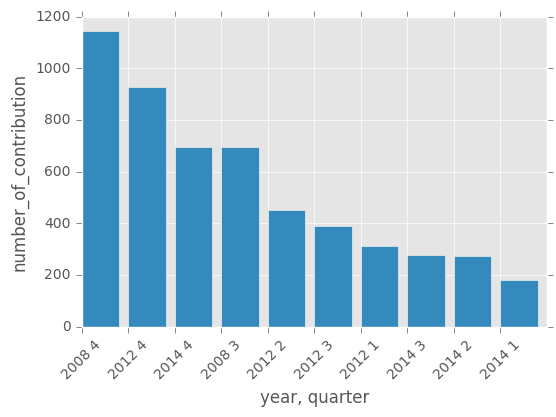

In [50]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
result = _
result.bar()

### Plot the number of contribution by quarter

In [51]:
%%sql
SELECT transaction_days.transaction_year as Year, transaction_days.transaction_quarter as Quarter, COUNT(Record.id) AS Number_of_Contribution
FROM transaction_days
FULL JOIN Record
ON transaction_days.transaction_time = Record.transaction_date
GROUP BY transaction_days.transaction_year, transaction_days.transaction_quarter
ORDER BY COUNT(Record.id) DESC

28 rows affected.


year,quarter,number_of_contribution
2011,2,6415
2009,2,4077
2011,1,3593
2013,1,3578
2009,1,3212
2013,2,3197
2009,4,1339
2010,4,1268
2008,4,1143
2012,4,926


<Container object of 28 artists>

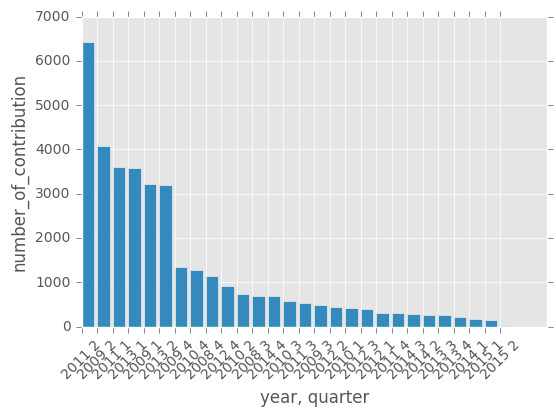

In [52]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
result = _
result.bar()

### Subquery

** Show the Candidate Information of the top 5 amount of contribution. **

In [53]:
%%sql
select Candidate.candidate_id, Candidate.candidate_name, Candidate.election_date, Fact.amount, Fact.schedule_type
from Fact
inner join Candidate
on Candidate.candidate_id = Fact.candidate_id
where Fact.id in (select Fact.id
                  from Fact
                  inner join Record
                  on Fact.id = Record.id
                  order by Fact.amount desc
                  limit 10) 

10 rows affected.


candidate_id,candidate_name,election_date,amount,schedule_type
228,Citizens Against The Taxpayer-Owned Hotel,2009-05-09 00:00:00,750000.0,Political Contributions Other Than Pledges Or Loans
228,Citizens Against The Taxpayer-Owned Hotel,2009-05-09 00:00:00,750000.0,Political Contributions Other Than Pledges Or Loans
228,Citizens Against The Taxpayer-Owned Hotel,2009-05-09 00:00:00,500000.0,Political Contributions Other Than Pledges Or Loans
228,Citizens Against The Taxpayer-Owned Hotel,2009-05-09 00:00:00,750000.0,Political Contributions Other Than Pledges Or Loans
228,Citizens Against The Taxpayer-Owned Hotel,2009-05-09 00:00:00,441000.0,Political Expenditures
228,Citizens Against The Taxpayer-Owned Hotel,2009-05-09 00:00:00,502218.0,Political Expenditures
228,Citizens Against The Taxpayer-Owned Hotel,2009-05-09 00:00:00,510463.0,Political Expenditures
228,Citizens Against The Taxpayer-Owned Hotel,2009-05-09 00:00:00,500000.0,Political Contributions Other Than Pledges Or Loans
14,George Ryan,2009-05-09 00:00:00,362110.0,Political Expenditures
14,George Ryan,2009-05-09 00:00:00,375000.0,Loans


### Rollups

In [54]:
%%sql
SELECT state, city, SUM(amount)
FROM dallas
GROUP BY ROLLUP (state,city)
ORDER BY state, city
LIMIT 10;

10 rows affected.


state,city,sum
AK,Homer,3000.0
AK,beverly hills,1000.0
AK,None,4000.0
AL,Birmingham,10300.0
AL,Daphne,1000.0
AL,Huntsville,530.0
AL,MOBILE,500.0
AL,Madison,285.0
AL,Mobile,500.0
AL,None,13115.0


### Joins

Show the detailed information in record of the Top5 amount of the contribution.

In [55]:
%%sql
SELECT Fact.id, Record.record_type, Record.transaction_date, Fact.amount, Fact.schedule_type
FROM Fact
inner join Record
ON Fact.id = Record.id
ORDER BY Fact.amount desc
LIMIT 5;

5 rows affected.


id,record_type,transaction_date,amount,schedule_type
A11801,April 9: 30th Day Before General Election 2009,2009-03-24 00:00:00,750000.0,Political Contributions Other Than Pledges Or Loans
A14771,May 1: 8th Day Before General Election 2009,2009-04-21 00:00:00,750000.0,Political Contributions Other Than Pledges Or Loans
A14782,May 1: 8th Day Before General Election 2009,2009-04-29 00:00:00,750000.0,Political Contributions Other Than Pledges Or Loans
F7091,May 1: 8th Day Before General Election 2009,2009-04-28 00:00:00,510463.0,Political Expenditures
F6985,May 1: 8th Day Before General Election 2009,2009-04-06 00:00:00,502218.0,Political Expenditures


## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.


** What would it take to automate this process? **

To automate the process, we need to check whether there is a column related to the content in the dimension table that can present every unique transaction. If there is, we can use it as the primary key directly. If there is not, we need to add a column and set the type serial since the auto-incremental value can uniquely represent the id of transaction.

** How often would you need to update the data? **

When there is any update for the information in one dimention table, we just need to update that table ather than all the tables. For example, if a client's contact type is changed, we just need to upate table 'Client'. While, if these is a new transaction, we not only need to add a record in the fact table, but also need to update the 'Report' and 'Record' table.

** Could you easily automate any data cleaning steps? **

We could create a procedure to update the null values as 'unknown' or 'invalid'  in dimension tables.

** What checks would you need to put in place to ensure quality? **

We need to check whether the amount of transaction is accurate or in the normal range. 

** Would humans need to be involved, or could you automate it all? **

We can add a procedure to limit the range of transaction amount. When the amount is out of range, it trigger the alarm and humans need to do mannual check what's actuall happened and why is this money out of range.

### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.

### COLLABORATION

Collaborators: Qinhui Xu and Zhian Wang

We finish the project2 together, so it is hard to say who did which part.
We feel good in the collaboration.